In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import itertools
import shutil
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.utils import plot_model

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [3]:
os.chdir("C:/Users/RENALDI/Desktop/skripsi/skripsi/")
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range (0, 5):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'), 2)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [4]:
train_path = "C:/Users/RENALDI/Desktop/skripsi/skripsi/train/"
valid_path = "C:/Users/RENALDI/Desktop/skripsi/skripsi/valid/"
test_path = "C:/Users/RENALDI/Desktop/skripsi/skripsi/test/"

In [5]:
datagen = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
)

In [7]:
train_batches = datagen.flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=2)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=2)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=2, shuffle=False)

Found 50 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [8]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [9]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [10]:
x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

In [11]:
model = Model(inputs=mobile.input, outputs=output)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10)

Epoch 1/10
25/25 [==============================] - 13s 524ms/step - loss: 1.5511 - accuracy: 0.4000 - val_loss: 2.2053 - val_accuracy: 0.4800
Epoch 2/10
25/25 [==============================] - 11s 423ms/step - loss: 0.9611 - accuracy: 0.7000 - val_loss: 1.4411 - val_accuracy: 0.6000
Epoch 3/10
25/25 [==============================] - 10s 414ms/step - loss: 0.5453 - accuracy: 0.8800 - val_loss: 0.7795 - val_accuracy: 0.6800
Epoch 4/10
25/25 [==============================] - 10s 418ms/step - loss: 0.4624 - accuracy: 0.8400 - val_loss: 0.6483 - val_accuracy: 0.7200
Epoch 5/10
25/25 [==============================] - 10s 412ms/step - loss: 0.8494 - accuracy: 0.7000 - val_loss: 0.4241 - val_accuracy: 0.8800
Epoch 6/10
25/25 [==============================] - 10s 412ms/step - loss: 0.4046 - accuracy: 0.8600 - val_loss: 0.2735 - val_accuracy: 0.9200
Epoch 7/10
25/25 [==============================] - 10s 411ms/step - loss: 0.3944 - accuracy: 0.9200 - val_loss: 0.2018 - val_accuracy: 0.9200

In [16]:
test_labels = test_batches.classes

In [17]:
predictions = model.predict(x=test_batches, verbose=0)

In [19]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [20]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

Confusion matrix, without normalization
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 1 1]
 [0 0 0 0 2]]


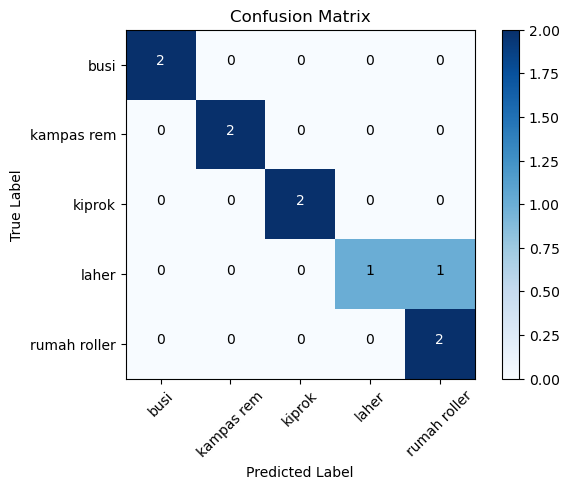

In [21]:
cm_plot_labels = ["busi", "kampas rem", "kiprok", "laher", "rumah roller"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')